In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import cross_val_score
from sklearn import svm

%matplotlib inline

/usr/lib64/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
original = pd.read_csv('cleaned_data_labelencoded.csv')
data = original.copy()

In [3]:
target = 'Accurate'
Y = data[target]
features = data.columns.drop(['Accurate', target])
X = data[features]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4330)

In [5]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
precision_scores = cross_val_score(clf, x_train, y_train, cv=3,scoring='precision', n_jobs=-1)
print (np.mean(precision_scores)+ np.std(precision_scores))

In [ ]:
recall_scores = cross_val_score(clf, x_train, y_train, cv=3,scoring='recall', n_jobs=-1
print (np.mean(recall_scores)+ np.std(recall_scores))

In [ ]:
f1_scores = precision_scores = cross_val_score(clf, x_train, y_train, cv=3,scoring='f1', n_jobs=-1)
print (np.mean(f1_scores)+ np.std(f1_scores))

In [12]:
param_dist = {"max_depth": [1,3, 7,8,12,None],
    "min_samples_split": [8,10,11,14,16,19],
    "min_samples_leaf": [1,2,3,4,5,6,7],
    "bootstrap": [True, False]}
rsearch = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=25)  
rsearch.fit(x_train,y_train)
rsearch.grid_scores_
rbestclf=rsearch.best_estimator_
print(rbestclf)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [19]:
rbestclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
precision_scores = cross_val_score(rbestclf, x_train, y_train, cv=20,scoring='precision', n_jobs=-1)
recall_scores = cross_val_score(rbestclf, x_train, y_train, cv=20,scoring='recall', n_jobs=-1)
f1_scores = cross_val_score(rbestclf, x_train, y_train, cv=20,scoring='f1', n_jobs=-1)
print (np.mean(precision_scores)+ np.std(precision_scores))
print (np.mean(recall_scores)+ np.std(recall_scores))
print (np.mean(f1_scores)+ np.std(f1_scores))

0.884981888677
0.989340536674
0.934026476169


In [ ]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
gsearch = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
gsearch.fit(x_train,y_train)
gsearch.grid_scores_
gbestclf=gsearch.best_estimator_
print(gbestclf)

In [ ]:
precision_scores = cross_val_score(gbestclf, x_train, y_train, cv=20,scoring='precision', n_jobs=-1)
recall_scores = cross_val_score(gbestclf, x_train, y_train, cv=20,scoring='recall', n_jobs=-1)
f1_scores = cross_val_score(gbestclf, x_train, y_train, cv=20,scoring='f1', n_jobs=-1)
print (np.mean(precision_scores) + np.std(precision_scores),
       (np.mean(recall_scores) + np.std(recall_scores)),
       (np.mean(f1_scores)+ np.std(f1_scores)))

In [59]:
predictions = clf.predict(x_test)

In [60]:
predictions[0:5]

array([1, 1, 1, 1, 1])

In [61]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: Accurate, dtype: int64

In [62]:
average_precision = average_precision_score(y_test, predictions)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.90


Text(0.5,1,'2-class Precision-Recall curve: AP=0.90')

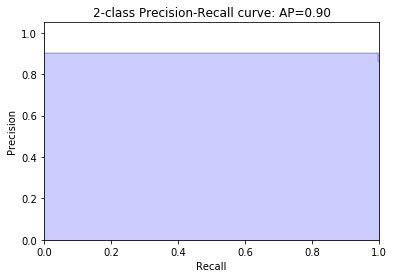

In [64]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Text(0.5,0,'Relative Importance')

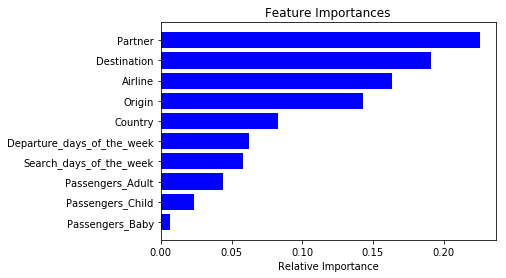

In [65]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [67]:
pd.crosstab(index=Y, columns=preds, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,31293,69753
1,2385,644801
